## Data Wrangle Customer Data & Combine Orders-Product Data
 

1. Import customers data
2. Check update column types and names in customer dataset
3. Conducted consistency checks on customer dataset
4. Duplicate Checks
5. Export Customers Data to Pickle File


In [49]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

1. Import Customers data

#import the file and compress the numeric values where possible

In [64]:
path = r'C:\Users\Raghu\Instacart Basket Analysis\01 Project Management\02 Data\original data\customers.csv'


In [65]:
file_path = os.path.join(path, '02 Data', 'Original Data', 'customers.csv')


In [68]:
df_customers = pd.read_csv(r'C:\Users\Raghu\Instacart Basket Analysis\01 Project Management\02 Data\original data\customers.csv'
)


In [70]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       206209 non-null  int64 
 1   First Name    194950 non-null  object
 2   Surnam        206209 non-null  object
 3   Gender        206209 non-null  object
 4   STATE         206209 non-null  object
 5   Age           206209 non-null  int64 
 6   date_joined   206209 non-null  object
 7   n_dependants  206209 non-null  int64 
 8   fam_status    206209 non-null  object
 9   income        206209 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 15.7+ MB


In [71]:
df_customers.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [72]:
df_customers.shape

(206209, 10)

In [73]:
df_customers.describe()

,user_id,Age,n_dependants,income
count,206209.000000,206209.000000,206209.000000,206209.000000
mean,103105.000000,49.501646,1.499823,94632.852548
std,59527.555167,18.480962,1.118433,42473.786988
min,1.000000,18.000000,0.000000,25903.000000
25%,51553.000000,33.000000,0.000000,59874.000000
50%,103105.000000,49.000000,1.000000,93547.000000
75%,154657.000000,66.000000,3.000000,124244.000000
max,206209.000000,81.000000,3.000000,593901.000000


## 2. Update Column Types and Names

2.1 Check & update column data types

In [74]:
# update user_id from int to str
df_customers['user_id'] = df_customers['user_id'].astype('str')

In [75]:
df_customers['date_joined'] = pd.to_datetime(df_customers['date_joined'])

In [76]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       206209 non-null  object        
 1   First Name    194950 non-null  object        
 2   Surnam        206209 non-null  object        
 3   Gender        206209 non-null  object        
 4   STATE         206209 non-null  object        
 5   Age           206209 non-null  int64         
 6   date_joined   206209 non-null  datetime64[ns]
 7   n_dependants  206209 non-null  int64         
 8   fam_status    206209 non-null  object        
 9   income        206209 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 15.7+ MB


In [83]:
#code to check for columns that have mixed data type
for col in df_customers.columns.tolist():
    weird = (df_customers[[col]].map(type) != df_customers[[col]].iloc[0].apply(type)).any(axis=1)
    if len(df_customers[weird]) > 0:
        print(col)

First Name


In [84]:
# casting first_name to string as its a mixed type
df_customers['First Name'] = df_customers['First Name'].astype('str')

# Observations
#First name has mixed types. Casted the columb to string

## 2.2 Update column names

In [86]:
#rename first name, surnam, gender, state and age
df_customers.rename(columns={"First Name": "first_name", "Surname": "last_name", "Gender": "gender", "STATE": "state",
                             "Age": "age"}, inplace=True)

In [87]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       206209 non-null  object        
 1   first_name    206209 non-null  object        
 2   Surnam        206209 non-null  object        
 3   gender        206209 non-null  object        
 4   state         206209 non-null  object        
 5   age           206209 non-null  int64         
 6   date_joined   206209 non-null  datetime64[ns]
 7   n_dependants  206209 non-null  int64         
 8   fam_status    206209 non-null  object        
 9   income        206209 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 15.7+ MB


## 3. Conduct Consistency Checks

3.1 Missing Values

In [89]:
# check columns with missing values
df_customers.columns[df_customers.isnull().any()]

Index([], dtype='object')

In [90]:
df_customers['first_name'].isnull().sum()

0

In [93]:
# checking for missing values in income
df_customers['income'].value_counts(dropna=False, sort=True)

income
57192     10
95891     10
95710     10
97532      9
98675      9
          ..
73141      1
71524      1
74408      1
44780      1
148828     1
Name: count, Length: 108012, dtype: int64

### Observation: 
1. first_name has 11,259 null has values. No action required 
2. No misisng values in income"


## 3.2 Consistency Checks

#### Gender

In [94]:
#check value types and counts of gender
df_customers['gender'].value_counts(dropna=False)

gender
Male      104067
Female    102142
Name: count, dtype: int64

## Observations:
    1. Gender: no change required

## State

In [95]:
df_customers['state'].nunique()

51

In [96]:
# list states to check for duplicates and error names.
df_customers['state'].value_counts(dropna=False)

state
Florida                 4044
Colorado                4044
Illinois                4044
Alabama                 4044
District of Columbia    4044
Hawaii                  4044
Arizona                 4044
Connecticut             4044
California              4044
Indiana                 4044
Arkansas                4044
Alaska                  4044
Delaware                4044
Iowa                    4044
Idaho                   4044
Georgia                 4044
Wyoming                 4043
Mississippi             4043
Oklahoma                4043
Utah                    4043
New Hampshire           4043
Kentucky                4043
Maryland                4043
Rhode Island            4043
Massachusetts           4043
Michigan                4043
New Jersey              4043
Kansas                  4043
South Dakota            4043
Minnesota               4043
Tennessee               4043
New York                4043
Washington              4043
Louisiana               4043
Montana 

## Observations
    1. 51 distinct states noted
    2. District of Columbia is considered as state hence why its 51 and not 50
    3. Customer's are almost equally split between all states (4043, 4044)

## Age

In [97]:
df_customers['age'].describe()

count    206209.000000
mean         49.501646
std          18.480962
min          18.000000
25%          33.000000
50%          49.000000
75%          66.000000
max          81.000000
Name: age, dtype: float64

In [98]:
#checking for any null values or odd ages
df_customers['age'].value_counts()

age
19    3329
55    3317
51    3317
56    3306
32    3305
      ... 
65    3145
25    3127
66    3114
50    3102
36    3101
Name: count, Length: 64, dtype: int64

Text(0.5, 1.0, 'Age Distribution')

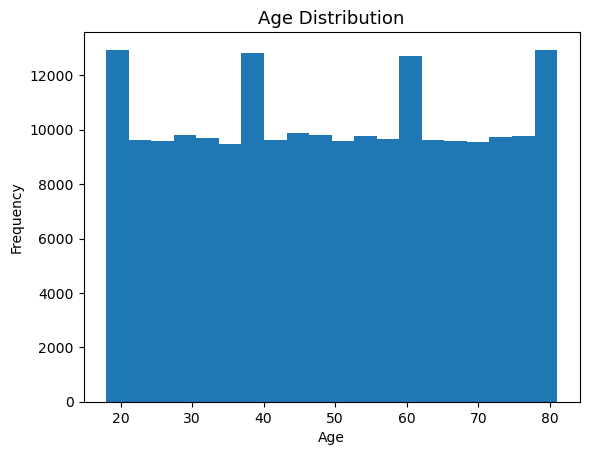

In [100]:
# checking distribution of age\n
df_customers['age'].plot.hist(bins=20, xlabel='Age')
plt.title('Age Distribution', fontsize=13)
    

## Observations
     1. No missing values in age
     2. Age min and max appear within expected ranges
     3. Age distribution idenfities no outlier.
     4. Age is distribution appears to have peaks for ages 20, 40, 60 and 80
 

## Date joined

In [102]:
# min value
df_customers['date_joined'].min()


Timestamp('2017-01-01 00:00:00')

In [103]:
#max value
df_customers['date_joined'].max()

Timestamp('2020-04-01 00:00:00')

In [104]:
#value counts
df_customers['date_joined'].value_counts(dropna=False, sort=False)
 

date_joined
2017-01-01    159
2017-01-02    154
2017-01-03    169
2017-01-04    188
2017-01-05    177
             ... 
2020-03-28    197
2020-03-29    171
2020-03-30    165
2020-03-31    149
2020-04-01    169
Name: count, Length: 1187, dtype: int64

## Observations:
     1. Date joined dates are from 2017-01-01 to 2020-04-01
     2. No consistency or missing values in date_joined

## n_dependants

In [105]:
#value counts of n_dependants
df_customers['n_dependants'].value_counts(dropna=False)

n_dependants
0    51602
3    51594
1    51531
2    51482
Name: count, dtype: int64

Text(0.5, 1.0, '# Dependants Distribution')

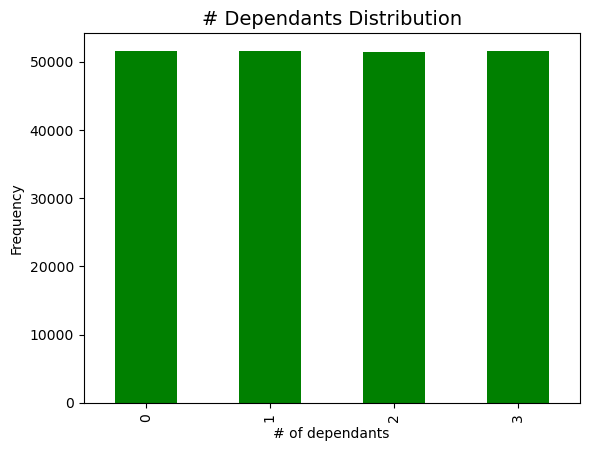

In [107]:
df_customers['n_dependants'].value_counts(dropna=True).sort_index().plot.bar(color=['green'], ylabel='Frequency', xlabel='# of dependants')
plt.title('# Dependants Distribution', fontsize=14)

## Observations
    
    1. No missing or inconsistent values in n_dependants
    2. dependants range from 0-4. 4 value types
    3. Number of dependants are equally distributed.

## fam_status

In [108]:
df_customers['fam_status'].value_counts(dropna=False)

fam_status
married                             144906
single                               33962
divorced/widowed                     17640
living with parents and siblings      9701
Name: count, dtype: int64

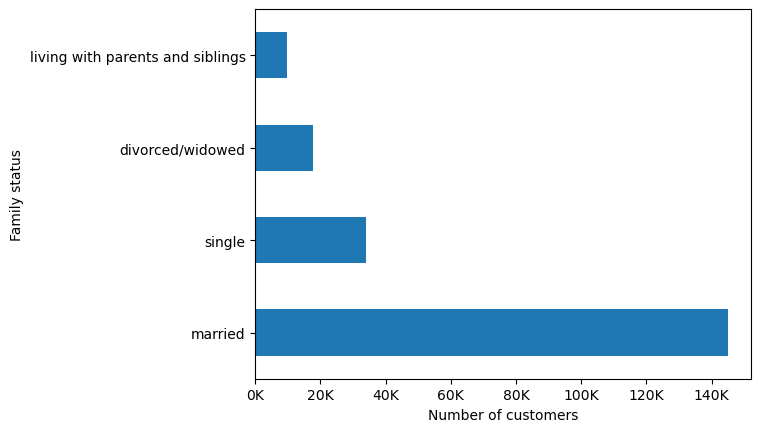

In [112]:
#plot bar chart to see the distribution of the fam_status values
barh_fam_status = df_customers['fam_status'].value_counts(dropna=False).plot.barh(xlabel="Number of customers", ylabel='Family status')
barh_fam_status.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y, pos: format(y/1000,'1.0f')+'K'))


## Income

In [113]:
df_customers['income'].describe()

count    206209.000000
mean      94632.852548
std       42473.786988
min       25903.000000
25%       59874.000000
50%       93547.000000
75%      124244.000000
max      593901.000000
Name: income, dtype: float64

In [114]:
df_customers['income'].median()

93547.0

C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='income', ylabel='income'>

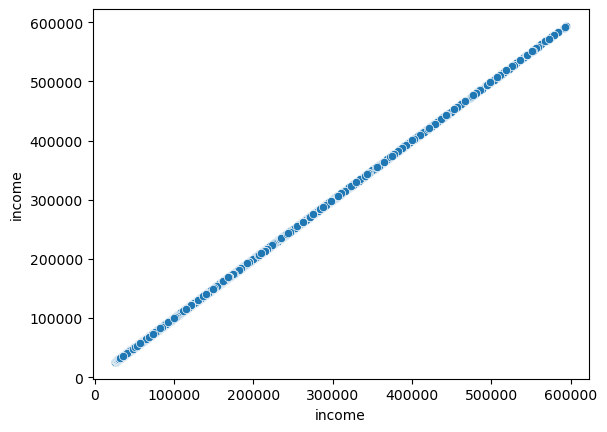

In [116]:
#scatterplot to identify any outliers in income column
sns.scatterplot(x="income", y="income", data=df_customers)

<Axes: ylabel='Frequency'>

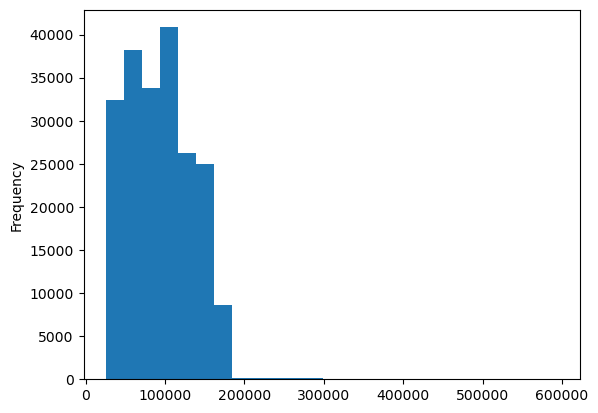

In [117]:
bins = [100000,200000,300000,400000, 500000]
df_customers['income'].plot.hist(bins=25)

In [119]:
df_check_income = df_customers[df_customers['income'] > 300000]
df_check_income.sort_values(by='income', ascending=True,)

,user_id,first_name,Surnam,gender,state,age,date_joined,n_dependants,fam_status,income
979,200930,Charles,Nichols,Male,South Carolina,60,2017-01-06,1,married,300913
86870,71498,Gloria,Stafford,Female,Virginia,69,2018-05-14,3,married,302234
138764,151552,Mark,Neal,Male,Oklahoma,71,2019-03-11,1,married,302363
47787,205650,Jeremy,Vang,Male,Kentucky,62,2017-10-02,0,divorced/widowed,302526
58395,77541,Kimberly,Anderson,Female,Montana,25,2017-12-03,2,married,302561
...,...,...,...,...,...,...,...,...,...,...
167037,189861,Pamela,Jordan,Female,Pennsylvania,47,2019-08-21,0,single,584097
111950,187680,Catherine,Church,Female,Wyoming,43,2018-10-07,2,married,590790
81583,103702,Kathryn,Mclaughlin,Female,Louisiana,55,2018-04-14,3,married,591089
202655,98580,nan,Patterson,Male,Washington,43,2020-03-12,2,married,592409


## Observations
    
    1. Income's distribution is right skewed where by mean and median are between 93,500 - 94,700
    2. There are valid incomes above 300,000, going upto 593,901
    3. No outliers found

## 4. Duplicates Checks

In [120]:
df_dups = df_customers[df_customers.duplicated()]

In [121]:
df_dups.shape

(0, 10)

## Observations: 
No duplicates

## 5. Combine Orders-Product with Customers

##5.1 Import orders-product pickle file

In [171]:
path = r'C:\\Users\\Raghu\\Instacart Basket Analysis\\01 Project Management\\02 Data\\03 Scripts\\Prepared Data'

In [172]:
os.makedirs(os.path.join(path, '02 Data', '03 Scripts', 'Prepared Data'), exist_ok=True)


In [173]:
ords_prods_merge.to_pickle(os.path.join(path, '02 Data', '03 Scripts', 'Prepared Data', 'orders_products_cust_types.pkl'))


In [174]:
ords_prods_merge.to_pickle(os.path.join(path, '02 Data', '03 Scripts', 'Prepared Data', 'orders_products_cust_types.csv'))


In [180]:
path = r'C:\Users\Raghu\Instacart Basket Analysis\01 Project Management\02 Data\03 Scripts\prepared data\02 Data\03 Scripts\Prepared Data\orders_products_cust_types.csv'

In [181]:
file_path = os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_cust_types.csv')


In [185]:
df_ords_prods = pd.read_pickle(r'C:\Users\Raghu\Instacart Basket Analysis\01 Project Management\02 Data\03 Scripts\prepared data\02 Data\03 Scripts\Prepared Data\orders_products_cust_types.pkl')


In [187]:
df_ords_prods.shape

(1048586, 22)

In [188]:
df_ords_prods['prices'] = df_ords_prods['prices'].astype('float32')

In [189]:
df_ords_prods['mean_expenses'] = df_ords_prods['prices'].astype('float32')

In [190]:
# checking for _merge column
df_ords_prods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048586 entries, 0 to 1048585
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0.1            1048586 non-null  int64  
 1   product_id              1048586 non-null  int64  
 2   product_name            1047682 non-null  object 
 3   aisle_id                1048586 non-null  int64  
 4   department_id           1048586 non-null  int64  
 5   prices                  1048586 non-null  float32
 6   Unnamed: 0              1048586 non-null  int64  
 7   order_id                1048586 non-null  int64  
 8   user_id                 1048586 non-null  int64  
 9   order_number            1048586 non-null  int64  
 10  order_of_week           1048586 non-null  int64  
 11  oder_hour_of _day       1048586 non-null  int64  
 12  days_since_prior_order  982072 non-null   float64
 13  add_to_cart_order       1048586 non-null  int64  
 14  re

In [191]:
# drop the _merge column in df_ords_prod prior to next merge as there is conflict
df_ords_prods.drop(columns=['_merge'], inplace=True)

In [192]:
df_ords_prods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048586 entries, 0 to 1048585
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0.1            1048586 non-null  int64  
 1   product_id              1048586 non-null  int64  
 2   product_name            1047682 non-null  object 
 3   aisle_id                1048586 non-null  int64  
 4   department_id           1048586 non-null  int64  
 5   prices                  1048586 non-null  float32
 6   Unnamed: 0              1048586 non-null  int64  
 7   order_id                1048586 non-null  int64  
 8   user_id                 1048586 non-null  int64  
 9   order_number            1048586 non-null  int64  
 10  order_of_week           1048586 non-null  int64  
 11  oder_hour_of _day       1048586 non-null  int64  
 12  days_since_prior_order  982072 non-null   float64
 13  add_to_cart_order       1048586 non-null  int64  
 14  re

In [194]:
df_customers['user_id'] = df_customers['user_id'].astype(int)


In [195]:
#merge ords_prods withc customers using user_id
df_ords_prods_customers_left = df_ords_prods.merge(df_customers, on=['user_id'], indicator=True)

In [196]:
df_ords_prods_customers_left['_merge'].value_counts(dropna=False)

_merge
both          1048586
left_only           0
right_only          0
Name: count, dtype: int64

In [197]:
df_ords_prods_customers_left.shape

(1048586, 32)

In [198]:
df_ords_prods_customers_left.drop(columns=['_merge'], inplace=True)

In [199]:
df_ords_prods_customers_left.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048586 entries, 0 to 1048585
Data columns (total 31 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   Unnamed: 0.1            1048586 non-null  int64         
 1   product_id              1048586 non-null  int64         
 2   product_name            1047682 non-null  object        
 3   aisle_id                1048586 non-null  int64         
 4   department_id           1048586 non-null  int64         
 5   prices                  1048586 non-null  float32       
 6   Unnamed: 0              1048586 non-null  int64         
 7   order_id                1048586 non-null  int64         
 8   user_id                 1048586 non-null  int64         
 9   order_number            1048586 non-null  int64         
 10  order_of_week           1048586 non-null  int64         
 11  oder_hour_of _day       1048586 non-null  int64         
 12  days_since_pri

## 5. Export Customer File to PKL

In [219]:
path = r'C:\\Users\\Raghu\\Instacart Basket Analysis\\01 Project Management\\02 Data\\03 Scripts\\Prepared Data'

In [220]:
os.makedirs(os.path.join(path, '02 Data', '03 Scripts', 'Prepared Data'), exist_ok=True)


In [221]:
ords_prods_merge.to_pickle(os.path.join(path, '02 Data', '03 Scripts', 'Prepared Data', 'orders_products_cust_types.pkl'))


In [223]:
import os


In [224]:
output_directory = os.path.join(path, '02 Data', 'Prepared Data' , '03 Scripts' , 'Prepared Data')


In [225]:
os.makedirs(output_directory, exist_ok=True)


In [226]:
df_ords_prods_customers_left.to_pickle(os.path.join(path,'02 Data/Prepared Data/ords_prods_customers_left.pkl'))

In [227]:
df_ords_prods_customers_left.to_pickle(os.path.join(path,'02 Data/Prepared Data/ords_prods_customers_left.csv'))